In [1]:
# !wget https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/Advertising.csv

zsh:1: command not found: wget


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Simple Linear Regression

In [11]:
# y =  mx + c
# x - single feature
# paramters = m&c
X = df['TV']
y = df['sales']

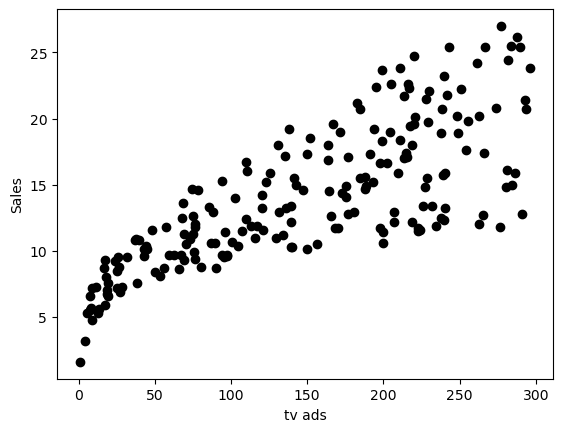

In [12]:
plt.scatter(X,y,c='black')
plt.xlabel('tv ads')
plt.ylabel("Sales")
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression


In [14]:
X.shape

(200,)

In [16]:
X.values

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 199.8, 100.4, 216.4, 182.6,
       262.7, 198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3,
       102.7, 131.1,  69. ,  31.5, 139.3, 237.4, 216.8, 199.1, 109.8,
        26.8, 129.4, 213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4,
       239.8,  75.3,  68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 109.8,
       134.3,  28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7,
       135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9,  25. ,  90.4,
        13.1, 255.4, 225.8, 241.7, 175.7, 209.6,  78.2,  75.1, 139.2,
        76.4, 125.7,  19.4, 141.3,  18.8, 224. , 123.1, 229.5,  87.2,
         7.8,  80.2,

In [17]:
X = X.values.reshape(-1,1) # Blanket

In [18]:
X.shape

(200, 1)

In [19]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [20]:
lr.coef_

array([0.04753664])

In [21]:
lr.intercept_

7.0325935491276885

In [22]:
# sales = 0.047*TV + 7.032

sales = 0.047*500 + 7.032
sales

30.532

In [23]:
lr.predict([[500]])

array([30.80091377])

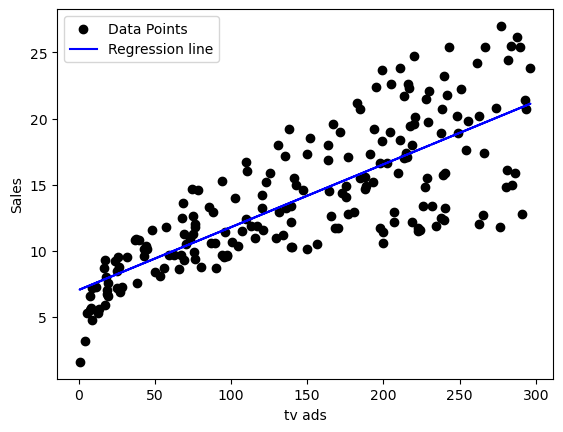

In [24]:
y_pred = lr.predict(X)

plt.scatter(X,y,c='black', label='Data Points')
plt.plot(X,y_pred,c='blue', label='Regression line')
plt.xlabel('tv ads')
plt.ylabel("Sales")
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.611875050850071

# Multiple Linear Regression

In [26]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [27]:
X = df.drop(columns=['Unnamed: 0', 'sales'])
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [28]:
y = df['sales']

In [29]:
lr = LinearRegression()
lr.fit(X,y)
lr.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [30]:
lr.intercept_

2.9388893694593996

In [31]:
lr.predict([[200,40,20]])

/Users/nachiketh/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.61226928])

In [32]:
y_pred = lr.predict(X)
r2_score(y,y_pred)

0.8972106381789522

# Evalation of Linear Regression


In [33]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [34]:
mean_squared_error(y,y_pred)

2.784126314510936

In [35]:
mean_absolute_error(y,y_pred)

1.2520112296870685

In [36]:
mean_squared_error(y,y_pred, squared=False) # RMSE

1.6685701407225697

In [37]:
r2_score(y,y_pred)

0.8972106381789522

In [ ]:
LinearRegression()

# Assumptions

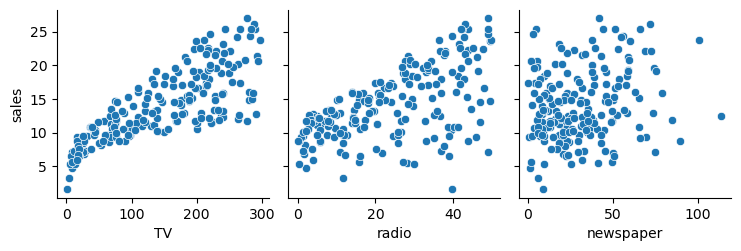

In [38]:
# Linear & Additive relation between feature and target
import seaborn as sns
sns.pairplot(df, x_vars= ['TV','radio','newspaper'], y_vars='sales')

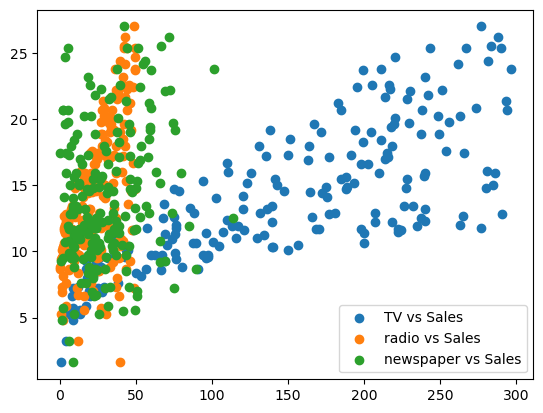

In [39]:
plt.scatter(df['TV'],df["sales"], label='TV vs Sales')
plt.scatter(df['radio'],df["sales"], label='radio vs Sales')
plt.scatter(df['newspaper'],df["sales"], label='newspaper vs Sales')
plt.legend()

In [41]:
df.drop(columns="Unnamed: 0").corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [42]:
#Reshape
arr = np.random.randint(0,100,(3,2))
arr

array([[34, 99],
       [60, 10],
       [38,  6]])

In [43]:
arr.reshape(-1,1)

array([[34],
       [99],
       [60],
       [10],
       [38],
       [ 6]])

In [44]:
arr.reshape(-1,3)

array([[34, 99, 60],
       [10, 38,  6]])

In [45]:
# Mean residual (error) is zero
predicts = lr.predict(X)
residuals = (y-predicts)

mean_residuals = np.mean(residuals)
print(f"mean residual is {mean_residuals}")

mean residual is -8.881784197001253e-17


In [ ]:
x = 10
y = 20
print("x is",x,"y is ",y)

In [ ]:
print(f"x is {x}, y is {y}")

In [ ]:
# Homoskedasticity

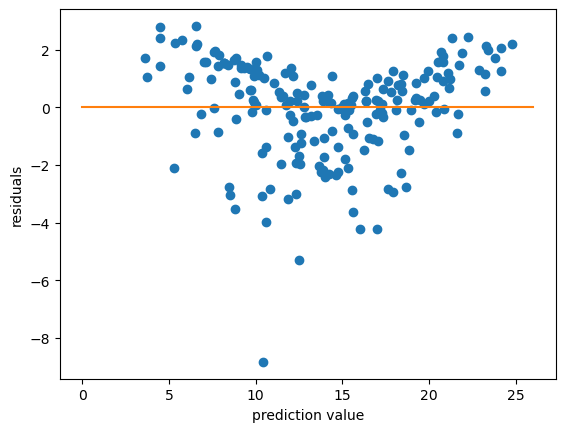

In [46]:
p = plt.plot(predicts,residuals,"o")
p = plt.plot([0,26],[0,0])
plt.xlabel("prediction value")
plt.ylabel('residuals')
plt.show()

In [47]:
#Check for Homoscedastic
# Gold Feld Quandt Test
# Null  --> Error terms are homoscedastic(p>0.05)
# Alternate - Error terms are heterosceastic

from statsmodels.compat import lzip
import statsmodels.stats.api as sms

lzip(['test-statistic','p-value','alternative'],sms.het_goldfeldquandt(residuals,X) )

[('test-statistic', 1.3444110321318332),
 ('p-value', 0.07338571632410364),
 ('alternative', 'increasing')]

/var/folders/xk/0pfb24315clcz5hhv8f69q5c0000gp/T/ipykernel_45044/2643464606.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: xlabel='sales', ylabel='Density'>

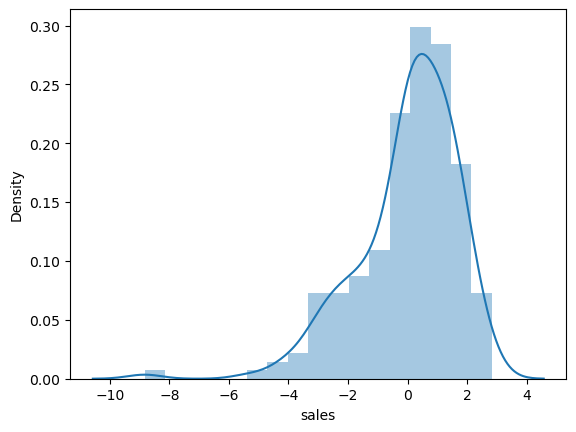

In [48]:
# Normal distribution of error terms
sns.distplot(residuals)

In [ ]:
# Multi collinearity

In [ ]:
df.corr()

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df.

In [56]:
def vif_score(X):
  X = X.values
  vif = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
  vif_score = pd.DataFrame()
  vif_score['Features'] = df.drop(columns=['sales',"Unnamed: 0"]).columns
  vif_score['vif_scores'] = vif
  return vif_score

In [57]:
vif_score(df.drop(columns=['sales',"Unnamed: 0"]))

,Features,vif_scores
0,TV,2.486772
1,radio,3.285462
2,newspaper,3.055245


In [ ]:
#if vif_score > 4 --> Multicollinearity in the dataset
# if vif_score > 4 --> drop the columns
# if vif_score between 2 to 4 --> Moderate Multi Collinearlity

# R2 Score

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y,predicts)

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
df = pd.read_csv("Advertising.csv")
df.drop(columns='Unnamed: 0',inplace=True)
X = df.drop(columns='sales')
y = df['sales']

In [ ]:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [ ]:
lasso = Lasso(alpha=0.8)
lasso.fit(X_train,y_train)

y_pred = lasso.predict(X_test)
r2_score(y_test,y_pred)

In [ ]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
ridge = Ridge(alpha=0.8)
ridge.fit(X_train,y_train)

y_pred = ridge.predict(X_test)
r2_score(y_test,y_pred)

In [ ]:
elastic = ElasticNet(alpha=0.8)
elastic.fit(X_train,y_train)

y_pred = elastic.predict(X_test)
r2_score(y_test,y_pred)